In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw, rdFingerprintGenerator
from rdkit.Chem import rdFMCS
from collections import Counter
from sklearn.cluster import KMeans, DBSCAN


In [6]:
lista = ["O=C(O)C1CCC(NC(=O)[C@@H]2NC3(CCCCC3)[C@@]3(C(=O)Nc4cc(Cl)ccc43)[C@H]2c2cccc(Cl)c2F)CC1",
 "Cc1cc(Cl)ccc1C1c2c(nn(CCO)c2C(C)C)C(=O)N1c1cccc(Cl)c1F",
 "CCOC(=O)c1c(C(C(=O)NCc2ccccc2)N(CC(C)C)C(C)=O)c2ccc(Cl)cc2n1C(=O)OC(C)(C)C",
 "CC1(C)CCC2(CC1)NC(C(=O)N[C@H]1CC[C@H](O)CC1)C(c1cccc(Cl)c1F)[C@]21C(=O)Nc2cc(Cl)ccc21",
 "COc1nc(N(C)C)ncc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1)N(c1c(F)c(C)nn1C)C2=O",
 "CCOCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)c2n1C[C@H]1CC[C@H](C)CC1",
 "CC(C)S(=O)(=O)C[C@@H](N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1)C(C)(C)C",
 "C[C@H]1CC[C@H](Cn2c(N3CCOC[C@H]3c3ccccc3)nc3cc(-c4noc(=O)[nH]4)nc(-c4cncnc4)c32)CC1",
 "CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2)[C@@](C)(c2ccc(Cl)cc2)N1C(=O)N1CCN(CCC(F)(F)F)CC1",
 "CC[C@@H](C)Oc1cc2c(cc1OC)CC(=O)N(c1ccc(C(C)N3CCOCC3=O)cc1)C2c1ccc(Cl)cc1",
 "CC[C@@H](CNS(=O)(=O)C(C)C)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1",
 "COc1ncc(-c2cc3c(n2C(C)C)C(c2ccc(Cl)cn2)N(c2ccc(F)c(Cl)c2)C3=O)c(OC)n1",
 "CNC(=O)Cc1cnc(OC)c(-c2nc3c(n2C(C)C)C(c2ccc(Cl)cc2)N(c2cccc(Cl)c2F)C3=O)c1",
 "CC(F)(c1ncccc1F)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)c2n1C[C@H]1CC[C@H](C)CC1",
 "CC(C)(C)S(=O)(=O)C[C@H](C1CCC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1",
 "Cc1cc(Cl)ccc1C1c2c(nn(Cc3cc(=O)[nH]c4ccccc34)c2C(C)C)C(=O)N1c1cccc(Cl)c1F",
 "COc1nc(N(C)C)ncc1-c1cc2c(n1C(C)C)C(c1ccc(Cl)cc1C)N(c1cc(Cl)c(=O)n(C)c1)C2=O",
 "C[C@@H]1CN(C(=O)C2CC2)C[C@@H](C)N1c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)c2n1C[C@H]1CC[C@H](C)CC1",
 "CC[C@@H](CN(C)S(=O)(=O)C1CC1)N1C(=O)[C@H](C(C)C(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1",
 "COC(=O)C(c1ccc(Cl)cc1)N1C(=O)c2cc(F)ccc2NC(=S)C1c1ccc(Cl)cc1",
 "COC(=O)C(c1ccc(Cl)cc1)N1C(=O)c2ccc(C(F)(F)F)cc2NC(=S)C1c1ccc(Cl)cc1",
 "CC(=O)N1CCN(c2nc3cc(-c4noc(=O)[nH]4)nc(-c4cncc(Cl)c4)c3n2C[C@H]2CC[C@H](C)CC2)[C@H](C)C1",
 "CCC(CC)S(=O)(=O)C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1",
 "CC[C@@H](C)Oc1cc2c(cc1OC)CC(=O)N(c1ccc(C(C)N(C(C)=O)[C@H]3CC[C@@H](N(C)C)CC3)cc1)C2c1ccc(Cl)cc1",
 "CCOC(c1nc2cc(-c3n[nH]c(=O)o3)nc(-c3cncc(Cl)c3)c2n1C[C@H]1CC[C@H](C)CC1)C1CCCC1",
 "CC[C@@H](c1nc2ccccc2s1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1",
 "COc1cc(C(N)=O)ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C)C)[C@@]2(C(=O)Nc3c2ccc(Cl)c3F)[C@H]1c1cccc(Cl)c1F",
 "CC1CN(c2nc3cc(-c4noc(=O)[nH]4)nc(-c4cncc(Cl)c4)c3n2C[C@H]2CC[C@H](C)CC2)C2COCCC2O1",
 "CN1CCC(CCNC(=O)[C@@H]2N[C@H](CC(C)(C)C)[C@]3(C(=O)Nc4cc(Cl)ccc43)[C@H]2c2cccc(Cl)c2F)CC1",
 "C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N([C@H](CS(=O)(=O)NCC2CCC2)C2CC2)C1=O",
 "CNc1ncc(-n2nc3c(c2C(C)C)C(c2ccc(C#N)cc2)N(c2cc(Cl)c(=O)n(C)c2)C3=O)c(OC)n1",
 "COc1ccccc1-c1nc2c(n1C(C)C)C(c1ccc(C#N)cc1C)N(c1cccc(Cl)c1F)C2=O",
 "COc1ccccc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1C)N(c1cc(Cl)cc(NC(C)=O)c1)C2=O",
 "COc1nc(N(C)C)ncc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1)N(c1c[nH]c(=O)c(Cl)c1)C2=O",
 "CCN1CN([C@H]2CC[C@H](CN(C)c3ccc(N4C(=O)Cc5cc(OC)c(OC(C)C)cc5[C@@H]4c4ccc(Cl)cc4)cn3)CC2)CC1=O",
 "C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)C(c2ccc(Cl)cc2)N([C@H](CN(c2ccccn2)S(C)(=O)=O)C2CC2)C1=O",
 "CN(C)S(=O)(=O)NC[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1",
 "CC(C)(C)S(=O)(=O)C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1",
 "C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N([C@H](CS(=O)(=O)C2CCCC2)C2CC2)C1=O",
 "CC[C@H](N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1)C(C)(C)O",
 "CNc1ncc(-n2nc3c(c2C(C)C)C(c2ccc(Cl)cc2)N(c2cc(Cl)cn(C)c2=O)C3=O)c(OC)n1",
 "COc1ccc(CC(=O)O)cc1-c1cc2c(n1C(C)C)[C@H](c1ccc(Cl)cc1)N(c1cc(Cl)ccc1C)C2=O",
 "CC[C@@H](CO)N1C(=O)[C@@H](CC(=O)O)C[C@H](c2cccc(Cl)c2)C1c1ccc(Cl)cc1",
 "COCCn1cc(N2C(=O)c3nc(-c4ccccc4OC)n(C(C)C)c3C2c2ccc(Cl)cc2C)cc(Cl)c1=O",
 "COc1ccccc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1)N(c1cc(Cl)ccc1OCc1nn[nH]n1)C2=O"]

In [7]:
import csv

smiles_to_coords = {}
with open("cluster_x_0515_y_-30-39.csv", newline="", encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        smiles = row["smiles"]
        x = float(row["x"])
        y = float(row["y"])
        smiles_to_coords[smiles] = (x, y)

coords = []
for smiles in lista:
    if smiles in smiles_to_coords:
        coords.append(smiles_to_coords[smiles])

coords

[(1.003499, -3.6323345),
 (0.9927978, -3.6749706),
 (0.99888134, -3.6441445),
 (0.9990059, -3.6233692),
 (0.9999172, -3.6870656),
 (0.9980058, -3.6836395),
 (0.96331686, -3.6383724),
 (0.9936877, -3.7497218),
 (0.9950428, -3.6319432),
 (0.9895233, -3.6232758),
 (0.9355998, -3.6800518),
 (0.9438005, -3.6813896),
 (0.9975832, -3.6932685),
 (0.9932422, -3.7103856),
 (0.9810365, -3.6121604),
 (0.99173266, -3.6756186),
 (0.94328237, -3.7049968),
 (0.99559385, -3.7411811),
 (0.93443996, -3.676302),
 (0.98888946, -3.5715125),
 (0.9912926, -3.6115835),
 (0.9905387, -3.7676752),
 (0.9395992, -3.6758308),
 (0.9916964, -3.6175935),
 (0.99886584, -3.7485354),
 (0.9470442, -3.6806848),
 (0.9517418, -3.6697664),
 (0.9914113, -3.7424228),
 (0.99108386, -3.626354),
 (0.97338843, -3.6328897),
 (0.9940814, -3.6551423),
 (0.9966816, -3.6915965),
 (1.0011045, -3.6459594),
 (0.9930658, -3.6464088),
 (0.98886645, -3.6151366),
 (0.9429314, -3.6546848),
 (0.9416325, -3.672476),
 (0.981393, -3.6126602),
 (0.93

In [8]:
listaC = [Chem.MolFromSmiles(c) for c in lista]

In [ ]:
from multiprocessing import Pool
from functools import partial

def compute_mcs_pair(mol_pair, threshold):
    """Compute MCS for single pair of molecules"""
    i, j, mol_i, mol_j = mol_pair
    
    if i == j:
        return (i, j, "-")
    
    try:
        mcs_result = rdFMCS.FindMCS([mol_i, mol_j], ringMatchesRingOnly=True, threshold=threshold)
        if mcs_result.numAtoms > 0:
            mcs_mol = mcs_result.smartsString
            return (i, j, mcs_mol)
        else:
            return (i, j, "No MCS")
    except:
        return (i, j, "Error")

def compute_mcs_unique_pairs(compounds, threshold, n_processes):
    """Compute MCS only for unique pairs (upper triangle)"""
    n_compounds = len(compounds)
    
    # Create unique pairs only
    unique_pairs = []
    for i in range(n_compounds):
        for j in range(i+1, n_compounds):
            unique_pairs.append((i, j, compounds[i], compounds[j]))
        
    # Use multiprocessing
    with Pool(processes=n_processes) as pool:
        results = pool.map(partial(compute_mcs_pair, threshold=threshold), unique_pairs)
    
    # Create symmetric matrix
    mcs_matrix = [[None for _ in range(n_compounds)] for _ in range(n_compounds)]
    
    # Fill diagonal
    for i in range(n_compounds):
        mcs_matrix[i][i] = "-"
    
    # Fill matrix (symmetric)
    for i, j, mcs_smarts in results:
        mcs_matrix[i][j] = mcs_smarts
        mcs_matrix[j][i] = mcs_smarts
    
    return mcs_matrix

mcs_matrix = compute_mcs_unique_pairs(listaC, threshold=0.9, n_processes=32)
mcs_df = pd.DataFrame(mcs_matrix, index=lista, columns=lista)
mcs_df

In [ ]:
remaining_smiles = set(lista)
clusters = []
iteration = 0

while remaining_smiles:
    #only remaining compounds
    filtered_df = mcs_df.loc[list(remaining_smiles), list(remaining_smiles)]
    
    #count SMARTS in the filtered dataframe
    all_smarts = []
    for col in filtered_df.columns:
        col_values = filtered_df[col].tolist()
        all_smarts.extend([sm for sm in col_values if sm not in ["-", "No MCS", "Error", None, ""]])
    if not all_smarts:
        break
    smarts_counter = Counter(all_smarts)
    max_count = max(smarts_counter.values())
    most_common_smarts = [sm for sm, count in smarts_counter.items() if count == max_count][0]
    
    #find all compounds with this SMARTS as MCS
    assigned = set()
    for idx in filtered_df.index:
        if most_common_smarts in filtered_df.loc[idx].values:
            assigned.add(idx)
    clusters.append((most_common_smarts, list(assigned)))
    remaining_smiles -= assigned
    iteration += 1

clusters

[('[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R]-,:;@[#6&R])-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]',
  ['CC[C@@H](CO)N1C(=O)[C@@H](CC(=O)O)C[C@H](c2cccc(Cl)c2)C1c1ccc(Cl)cc1',
   'CC(C)S(=O)(=O)C[C@@H](N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1)C(C)(C)C',
   'CC[C@@H](CN(C)S(=O)(=O)C1CC1)N1C(=O)[C@H](C(C)C(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
   'CC(C)(C)S(=O)(=O)C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
   'COc1ccccc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1)N(c1cc(Cl)ccc1OCc1nn[nH]n1)C2=O',
   'CNc1ncc(-n2nc3c(c2C(C)C)C(c2ccc(Cl)cc2)N(c2cc(Cl)cn(C)c2=O)C3=O)c(OC)n1',
   'COc1ccccc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1C)N(c1cc(Cl)cc(NC(C)=O)c1)C2=O',
   'CCC(CC)S(=O)(=O)C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
   'CC[C@@H](CNS(=O)(=O)C(C)C)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1',
   'COc1nc(N(C)C)ncc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1)N(c1c[nH]c(

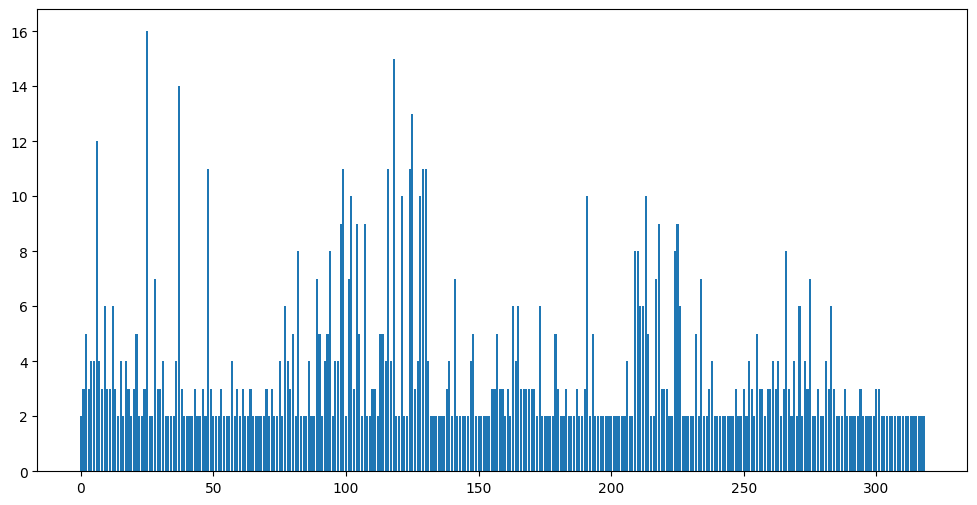

In [11]:
import matplotlib.pyplot as plt

unique_smarts = list(smarts_counter.keys())
counts = [smarts_counter[sm] for sm in unique_smarts]

plt.figure(figsize=(12, 6))
plt.bar(range(len(unique_smarts)), counts)
plt.show()

In [13]:
df_molecules2 = pd.DataFrame({
    "smiles": lista,
    "x": [c[0] if i < len(coords) else None for i, c in enumerate(coords)],
    "y": [c[1] if i < len(coords) else None for i, c in enumerate(coords)],
    "cluster": ""
})

In [14]:
dfNumAtom = []
n = len(mcs_df)
for i in range(n):
    rows = []
    for j in range(n):
        if i == j:
            rows.append("-")
        else:
            mcs_smarts = mcs_df.iloc[i, j]
            if mcs_smarts not in ["-", "No MCS", "Error", None, ""]:
                mcs = Chem.MolFromSmarts(mcs_smarts)
                if mcs is not None:
                    mcsNumAtm = mcs.GetNumAtoms()
                    rows.append(f"{mcsNumAtm:.2f}")
                else:
                    rows.append(0)
            else:
                rows.append(0)
    dfNumAtom.append(rows)

dfNumAtom = pd.DataFrame(dfNumAtom, index = lista, columns = lista)
dfNumAtom

,O=C(O)C1CCC(NC(=O)[C@@H]2NC3(CCCCC3)[C@@]3(C(=O)Nc4cc(Cl)ccc43)[C@H]2c2cccc(Cl)c2F)CC1,Cc1cc(Cl)ccc1C1c2c(nn(CCO)c2C(C)C)C(=O)N1c1cccc(Cl)c1F,CCOC(=O)c1c(C(C(=O)NCc2ccccc2)N(CC(C)C)C(C)=O)c2ccc(Cl)cc2n1C(=O)OC(C)(C)C,CC1(C)CCC2(CC1)NC(C(=O)N[C@H]1CC[C@H](O)CC1)C(c1cccc(Cl)c1F)[C@]21C(=O)Nc2cc(Cl)ccc21,COc1nc(N(C)C)ncc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1)N(c1c(F)c(C)nn1C)C2=O,CCOCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)c2n1C[C@H]1CC[C@H](C)CC1,CC(C)S(=O)(=O)C[C@@H](N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1)C(C)(C)C,C[C@H]1CC[C@H](Cn2c(N3CCOC[C@H]3c3ccccc3)nc3cc(-c4noc(=O)[nH]4)nc(-c4cncnc4)c32)CC1,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2)[C@@](C)(c2ccc(Cl)cc2)N1C(=O)N1CCN(CCC(F)(F)F)CC1,CC[C@@H](C)Oc1cc2c(cc1OC)CC(=O)N(c1ccc(C(C)N3CCOCC3=O)cc1)C2c1ccc(Cl)cc1,...,C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)C(c2ccc(Cl)cc2)N([C@H](CN(c2ccccn2)S(C)(=O)=O)C2CC2)C1=O,CN(C)S(=O)(=O)NC[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1,CC(C)(C)S(=O)(=O)C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1,C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N([C@H](CS(=O)(=O)C2CCCC2)C2CC2)C1=O,CC[C@H](N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1)C(C)(C)O,CNc1ncc(-n2nc3c(c2C(C)C)C(c2ccc(Cl)cc2)N(c2cc(Cl)cn(C)c2=O)C3=O)c(OC)n1,COc1ccc(CC(=O)O)cc1-c1cc2c(n1C(C)C)[C@H](c1ccc(Cl)cc1)N(c1cc(Cl)ccc1C)C2=O,CC[C@@H](CO)N1C(=O)[C@@H](CC(=O)O)C[C@H](c2cccc(Cl)c2)C1c1ccc(Cl)cc1,COCCn1cc(N2C(=O)c3nc(-c4ccccc4OC)n(C(C)C)c3C2c2ccc(Cl)cc2C)cc(Cl)c1=O,COc1ccccc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1)N(c1cc(Cl)ccc1OCc1nn[nH]n1)C2=O
O=C(O)C1CCC(NC(=O)[C@@H]2NC3(CCCCC3)[C@@]3(C(=O)Nc4cc(Cl)ccc43)[C@H]2c2cccc(Cl)c2F)CC1,-,13.00,11.00,37.00,12.00,14.00,13.00,10.00,11.00,15.00,...,13.00,13.00,13.00,13.00,13.00,13.00,14.00,13.00,12.00,13.00
Cc1cc(Cl)ccc1C1c2c(nn(CCO)c2C(C)C)C(=O)N1c1cccc(Cl)c1F,13.00,-,8.00,13.00,18.00,13.00,14.00,12.00,11.00,20.00,...,14.00,14.00,14.00,14.00,14.00,25.00,24.00,14.00,21.00,26.00
CCOC(=O)c1c(C(C(=O)NCc2ccccc2)N(CC(C)C)C(C)=O)c2ccc(Cl)cc2n1C(=O)OC(C)(C)C,11.00,8.00,-,11.00,7.00,9.00,10.00,8.00,8.00,9.00,...,10.00,10.00,10.00,10.00,10.00,8.00,9.00,10.00,8.00,8.00
CC1(C)CCC2(CC1)NC(C(=O)N[C@H]1CC[C@H](O)CC1)C(c1cccc(Cl)c1F)[C@]21C(=O)Nc2cc(Cl)ccc21,37.00,13.00,11.00,-,12.00,14.00,13.00,10.00,11.00,15.00,...,13.00,13.00,13.00,13.00,13.00,13.00,14.00,13.00,12.00,13.00
COc1nc(N(C)C)ncc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1)N(c1c(F)c(C)nn1C)C2=O,12.00,18.00,7.00,12.00,-,14.00,13.00,14.00,18.00,16.00,...,13.00,13.00,13.00,13.00,13.00,17.00,26.00,13.00,27.00,17.00
CCOCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)c3)c2n1C[C@H]1CC[C@H](C)CC1,14.00,13.00,9.00,14.00,14.00,-,11.00,28.00,11.00,11.00,...,14.00,14.00,14.00,14.00,11.00,12.00,14.00,11.00,14.00,12.00
CC(C)S(=O)(=O)C[C@@H](N1C(=O)[C@@](C)(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@H]1c1ccc(Cl)cc1)C(C)(C)C,13.00,14.00,10.00,13.00,13.00,11.00,-,11.00,18.00,14.00,...,28.00,28.00,34.00,31.00,31.00,14.00,20.00,29.00,14.00,14.00
C[C@H]1CC[C@H](Cn2c(N3CCOC[C@H]3c3ccccc3)nc3cc(-c4noc(=O)[nH]4)nc(-c4cncnc4)c32)CC1,10.00,12.00,8.00,10.00,14.00,28.00,11.00,-,10.00,12.00,...,11.00,11.00,11.00,11.00,11.00,12.00,12.00,11.00,12.00,12.00
CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2)[C@@](C)(c2ccc(Cl)cc2)N1C(=O)N1CCN(CCC(F)(F)F)CC1,11.00,11.00,8.00,11.00,18.00,11.00,18.00,10.00,-,11.00,...,18.00,18.00,18.00,18.00,18.00,11.00,21.00,18.00,21.00,11.00
CC[C@@H](C)Oc1cc2c(cc1OC)CC(=O)N(c1ccc(C(C)N3CCOCC3=O)cc1)C2c1ccc(Cl)cc1,15.00,20.00,9.00,15.00,16.00,11.00,14.00,12.00,11.00,-,...,14.00,14.00,14.00,14.00,14.00,19.00,21.00,14.00,18.00,20.00


In [15]:
from collections import Counter

most_common_values = []
most_common_smarts = []

for col in mcs_df.columns:
    col_values = mcs_df[col].tolist()
    filtered = [sm for sm in col_values if sm not in ["-", "No MCS", "Error", None, ""] and sm != ""]
    if filtered:
        counter = Counter(filtered)
        most_common_smarts_val, count = counter.most_common(1)[0]
        most_common_smarts.append(most_common_smarts_val)
        most_common_values.append(count)
    else:
        most_common_smarts.append("")
        most_common_values.append(0)
        
most_common_smarts

['[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R]',
 '[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R](-&@[#6&R]:,-;@[#6&R])-&@[#7&R]-&@[#6&R](-&@[#6&R])=&!@[#8&!R]',
 '[#6&!R]-&!@[#7&R](-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&!R]-&!@[#6&!R]=&!@[#8&!R])-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R]',
 '[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R]',
 '[#6&R](:,-;@[#6&R])-&@[#6&R](-&@[#7&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])=&!@[#8&!R]',
 '[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]):,-;@[#6&R]:,-;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]):,-;@[#6&R]',
 '[#7]1-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@1-&!@[#6&R](:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#6&R]',
 '[#7&R](-&@[#6&R]-&@[#6&R])-&@[#6&R](-&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1',
 '[#6&!R]-&!@[#7&R](-&@[#6&R

In [16]:
dictMostCommonSmarts = dict(zip(most_common_smarts, most_common_values))
dictMostCommonSmarts

{'[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R]': 10,
 '[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R](-&@[#6&R]:,-;@[#6&R])-&@[#7&R]-&@[#6&R](-&@[#6&R])=&!@[#8&!R]': 12,
 '[#6&!R]-&!@[#7&R](-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&!R]-&!@[#6&!R]=&!@[#8&!R])-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R]': 10,
 '[#6&R](:,-;@[#6&R])-&@[#6&R](-&@[#7&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])=&!@[#8&!R]': 6,
 '[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]):,-;@[#6&R]:,-;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]):,-;@[#6&R]': 4,
 '[#7]1-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@1-&!@[#6&R](:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#6&R]': 5,
 '[#7&R](-&@[#6&R]-&@[#6&R])-&@[#6&R](-&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1': 9,
 '[#6&!R]-&!@[#7&R](-&@[#6&R])-&@[#6&R](-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1)-&!@[#6]1:&@[#6]:&@[#6]:&@

In [17]:
max_values = []
max_smarts = []

for col in dfNumAtom.columns:
    col_values = dfNumAtom[col].replace("-", 0).astype(float)
    max_val = col_values.max()
    if max_val == 0:
        max_values.append(0)
        max_smarts.append("")
    else:
        idx = col_values.idxmax()
        max_values.append(int(max_val))
        max_smarts.append(mcs_df.loc[idx, col])
        
max_smarts

['[#6]1-&@[#6]-&@[#6]-&@[#6](-&@[#6]-&@[#6]-&@1)-&!@[#7&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#6]1-&@[#7]-&@[#6]2(-&@[#6]3(-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1-&!@[#9&!R])-&!@[#17&!R])-&@[#6](=&!@[#8&!R])-&@[#7]-&@[#6]1:&@[#6]-&@3:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R])-&@[#6]-&@[#6]-&@[#6]-&@[#6]-&@[#6]-&@2',
 '[#6&!R]-&!@[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6]1-&@[#6]2:&@[#6](-&@[#6](-&@[#7]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1-&!@[#9&!R])-&!@[#17&!R])=&!@[#8&!R]):&@[#7]:&@[#7](:&@[#6]:&@2-&!@[#6&!R](-&!@[#6&!R])-&!@[#6&!R])-&!@[#6&!R]',
 '[#6&R]:,-;@[#6&R](-&!@[#6&!R]-&!@[#6&!R]-&!@[#7&!R]-&!@[#6&!R]-&!@[#6&R]:,-;@[#6&R]:,-;@[#6&R]:,-;@[#6&R]:&@[#6&R]:&@[#6&R]):,-;@[#6&R]:,-;@[#6&R]:,-;@[#7&R]-&!@[#6&!R]',
 '[#6]1-&@[#6]-&@[#6]-&@[#6](-&@[#6]-&@[#6]-&@1)-&!@[#7&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#6]1-&@[#7]-&@[#6]2(-&@[#6]3(-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1-&!@[#9&!R])-&!@[#17&!R])-&@[#6](=&!

In [18]:
dictMaxValuesMaxSmarts = dict(zip(max_smarts, max_values))

In [19]:
def tanimotoDistanceMatrix(fpList):
    dissimilarityMatrix = []
    for i in range (1, len(fpList)):
        similarities = DataStructs.BulkTanimotoSimilarity(fpList[i], fpList[:i])
        dissimilarityMatrix.extend([1 - x for x in similarities])
    return dissimilarityMatrix

In [20]:
def clusterFingerprints(fingerprints, cutoff):
    distanceMatrix = tanimotoDistanceMatrix(fingerprints)
    clusters = Butina.ClusterData(distanceMatrix, len(fingerprints), cutoff, isDistData = True)
    clusters = sorted(clusters, key = len, reverse = True)
    return clusters

In [21]:
rdkitGen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
fingerprints = []
for mol in most_common_smarts:
    moll = Chem.MolFromSmarts(mol)
    Chem.SanitizeMol(moll)
    fp = rdkitGen.GetFingerprint(moll)
    fingerprints.append(fp)

print(f"Number of compounds converted: {len(fingerprints)}")
print(f"Fingerprint length per compound: {len(fingerprints[0])}")

Number of compounds converted: 45
Fingerprint length per compound: 1024


In [22]:
tanimotoFp = tanimotoDistanceMatrix(fingerprints)
tanimotoFp

[0.8367346938775511,
 0.9375,
 0.8936170212765957,
 0.0,
 0.8367346938775511,
 0.9375,
 0.8043478260869565,
 0.6341463414634146,
 0.9130434782608696,
 0.8043478260869565,
 0.9259259259259259,
 0.8867924528301887,
 0.8723404255319149,
 0.9259259259259259,
 0.9038461538461539,
 0.9807692307692307,
 0.9411764705882353,
 0.9787234042553191,
 0.9807692307692307,
 0.9387755102040817,
 0.9215686274509804,
 0.8048780487804879,
 0.8372093023255813,
 0.926829268292683,
 0.8048780487804879,
 0.8837209302325582,
 0.8913043478260869,
 0.9777777777777777,
 0.7272727272727273,
 0.7045454545454546,
 0.9148936170212766,
 0.7272727272727273,
 0.7209302325581395,
 0.8846153846153846,
 0.9607843137254902,
 0.7105263157894737,
 0.8823529411764706,
 0.8163265306122449,
 0.9803921568627451,
 0.8823529411764706,
 0.782608695652174,
 0.9827586206896551,
 0.9411764705882353,
 0.9361702127659575,
 0.8367346938775511,
 0.9807692307692307,
 0.9411764705882353,
 0.9787234042553191,
 0.9807692307692307,
 0.938775510

In [23]:
tanimotoFp95 = [1 if fp < 0.1 else 0 for fp in tanimotoFp]
tanimotoFp95

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [24]:
num_compounds = len(most_common_smarts)

tanimoto_matrix = np.zeros((num_compounds, num_compounds))

idx = 0
for i in range(1, num_compounds):
    for j in range(i):
        tanimoto_matrix[i, j] = tanimotoFp[idx]
        tanimoto_matrix[j, i] = tanimotoFp[idx]
        idx += 1

#np.fill_diagonal(tanimoto_matrix, 1.0)

df_tanimoto = pd.DataFrame(tanimoto_matrix, index=most_common_smarts, columns=most_common_smarts)
df_tanimoto

,[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],"[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R](-&@[#6&R]:,-;@[#6&R])-&@[#7&R]-&@[#6&R](-&@[#6&R])=&!@[#8&!R]","[#6&!R]-&!@[#7&R](-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&!R]-&!@[#6&!R]=&!@[#8&!R])-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R]",[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],"[#6&R](:,-;@[#6&R])-&@[#6&R](-&@[#7&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])=&!@[#8&!R]","[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]):,-;@[#6&R]:,-;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]):,-;@[#6&R]","[#7]1-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@1-&!@[#6&R](:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#6&R]",[#7&R](-&@[#6&R]-&@[#6&R])-&@[#6&R](-&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1,[#6&!R]-&!@[#7&R](-&@[#6&R])-&@[#6&R](-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1)-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R],"[#7]1-&@[#6](=&!@[#8&!R])-&@[#6]-&@[#6]-,:;@[#6]-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]",...,"[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]):,-;@[#6&R]:,-;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]):,-;@[#6&R]","[#6&!R](-&!@[#6&R](-&@[#6&R])-&@[#6&R])-&!@[#7&R](-,:;@[#6&R])-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]","[#6&!R](-&!@[#6&R](-&@[#6&R])-&@[#6&R])-&!@[#7&R](-,:;@[#6&R])-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]","[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R])-,:;@[#6&R]-,:;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R])-,:;@[#6&R]",[#6&!R]-&!@[#6&!R]-&!@[#7]1-&@[#6](=&!@[#8&!R])-&@[#6](-&!@[#6&!R])(-&!@[#6&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#8&!R])-&@[#6]-&@[#6](-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],"[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R]-,:;@[#6&R])-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]","[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R]-,:;@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1)-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]",[#6&!R]-&!@[#6&!R]-&!@[#7]1-&@[#6](=&!@[#8&!R])-&@[#6](-&!@[#6&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#8&!R])-&@[#6]-&@[#6](-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],"[#6&!R]-&!@[#6&!R]-&!@[#7&R](-,:;@[#6&R]-,:;@[#6&R]-&@[#6&R])-,:;@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1","[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R]-,:;@[#6&R])-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]"
[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],0.000000,0.836735,0.937500,0.000000,0.804348,0.925926,0.980769,0.804878,0.727273,0.882353,...,0.925926,0.945455,0.945455,0.945455,0.777778,0.808511,0.807692,0.754098,0.844444,0.808511
"[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R](-&@[#6&R]:,-;@[#6&R])-&@[#7&R]-&@[#6&R](-&@[#6&R])=&!@[#8&!R]",0.836735,0.000000,0.893617,0.836735,0.634146,0.886792,0.941176,0.837209,0.704545,0.816327,...,0.886792,0.886792,0.886792,0.886792,0.800000,0.674419,0.740000,0.796875,0.872340,0.674419
"[#6&!R]-&!@[#7&R](-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&!R]-&!@[#6&!R]=&!@[#8&!R])-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R]",0.937500,0.893617,0.000000,0.937500,0.913043,0.872340,0.978723,0.926829,0.914894,0.980392,...,0.872340,0.847826,0.847826,0.847826,0.956522,0.866667,0.944444,0.940299,0.880952,0.866667
[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],0.000000,0.836735,0.937500,0.000000,0.8043

In [25]:
tanimoto_95_matrix = np.zeros((num_compounds, num_compounds))

for i in range(1, num_compounds):
    for j in range(i):
        if df_tanimoto.iloc[i, j] <= 0.1:
            tanimoto_95_matrix[i, j] = 1
            tanimoto_95_matrix[j, i] = 1
        else:
            tanimoto_95_matrix[i, j] = 0
            tanimoto_95_matrix[j, i] = 0

df_tanimoto_95 = pd.DataFrame(tanimoto_95_matrix, index = most_common_smarts, columns = most_common_smarts)
df_tanimoto_95

,[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],"[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R](-&@[#6&R]:,-;@[#6&R])-&@[#7&R]-&@[#6&R](-&@[#6&R])=&!@[#8&!R]","[#6&!R]-&!@[#7&R](-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&!R]-&!@[#6&!R]=&!@[#8&!R])-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R]",[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],"[#6&R](:,-;@[#6&R])-&@[#6&R](-&@[#7&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])=&!@[#8&!R]","[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]):,-;@[#6&R]:,-;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]):,-;@[#6&R]","[#7]1-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@1-&!@[#6&R](:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#6&R]",[#7&R](-&@[#6&R]-&@[#6&R])-&@[#6&R](-&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1,[#6&!R]-&!@[#7&R](-&@[#6&R])-&@[#6&R](-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1)-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R],"[#7]1-&@[#6](=&!@[#8&!R])-&@[#6]-&@[#6]-,:;@[#6]-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]",...,"[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]):,-;@[#6&R]:,-;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R]):,-;@[#6&R]","[#6&!R](-&!@[#6&R](-&@[#6&R])-&@[#6&R])-&!@[#7&R](-,:;@[#6&R])-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]","[#6&!R](-&!@[#6&R](-&@[#6&R])-&@[#6&R])-&!@[#7&R](-,:;@[#6&R])-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]","[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R])-,:;@[#6&R]-,:;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R])-,:;@[#6&R]",[#6&!R]-&!@[#6&!R]-&!@[#7]1-&@[#6](=&!@[#8&!R])-&@[#6](-&!@[#6&!R])(-&!@[#6&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#8&!R])-&@[#6]-&@[#6](-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],"[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R]-,:;@[#6&R])-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]","[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R]-,:;@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1)-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]",[#6&!R]-&!@[#6&!R]-&!@[#7]1-&@[#6](=&!@[#8&!R])-&@[#6](-&!@[#6&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#8&!R])-&@[#6]-&@[#6](-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],"[#6&!R]-&!@[#6&!R]-&!@[#7&R](-,:;@[#6&R]-,:;@[#6&R]-&@[#6&R])-,:;@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1","[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R]-,:;@[#6&R])-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]"
[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R](-&@[#6&R]:,-;@[#6&R])-&@[#7&R]-&@[#6&R](-&@[#6&R])=&!@[#8&!R]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[#6&!R]-&!@[#7&R](-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&!R]-&!@[#6&!R]=&!@[#8&!R])-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[#6&R](:,-;@[#6&R])-&@[#6&R](-&@[#7&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])=&!@[#8&!R]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&

In [26]:
dict_smiles_tanimoto95 = {}

for i, key_smiles in enumerate(most_common_smarts):
    similar_smiles = set()
    for j, compare_smiles in enumerate(most_common_smarts):
        if i != j and tanimoto_matrix[i, j] > 0.90 and compare_smiles != key_smiles:
            similar_smiles.add(compare_smiles)
    dict_smiles_tanimoto95[key_smiles] = list(similar_smiles)

dict_smiles_tanimoto95


{'[#7&R](-&@[#6&R]-&@[#6&R]-&@[#6&R])-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R]': ['[#7]1-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@[#6]-,:;@1-&!@[#6&R](:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#6&R]',
  '[#6&!R](-&!@[#6&R](-&@[#6&R])-&@[#6&R])-&!@[#7&R](-,:;@[#6&R])-,:;@[#6&R]-,:;@[#6&R]-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]',
  '[#6]1:&@[#7]:&@[#6](:&@[#6](:&@[#7]:&@1-&!@[#6&!R])-,:;@[#6&R](-&!@[#6&R](:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#6&R])-,:;@[#7&R])-,:;@[#6&R]',
  '[#6&R](-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R])-,:;@[#6&R]-,:;@[#7&R](-&!@[#6&!R]-&!@[#6&R](-&@[#6&R])-&@[#6&R])-,:;@[#6&R]',
  '[#6&R]:&@[#6&R](-&!@[#6&R]:,-;@[#6&R]:,-;@[#6&R]-&@[#6&R](-&@[#7&R]-&@[#6&R]-&!@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R](-&!@[#17&!R]):&@[#6&R])=&!@[#8&!R]):&@[#6&R]',
  '[#6&!R](-&!@[#6]1:,-;@[#6]:,-;@[#6]:,-;@[#6]:,-;@[#6]:,-;@[#6]:,-;@1)-&!@[#7&R](-,:;@[#6&R])-,:;@[#6&R]-,:;@[#6&R]-,:;@[#7&R]-,:;@[#6&R]:&@[#6&R]:&@[#6&R]',
  

____

___

___

In [27]:
import torch

def Nystrom_X_cn(mM,rM,nM,MorganFP,n_max=0):
    """
    Compute the Nystrom approximation of the centered normalized feature matrix.

    :param mM: Number of molecule landmarks
    :type mM: int
    :param rM: Number of dimensions to keep after SVD for molecule features
    :type rM: int
    :param nM: Total number of molecules.
    :type nM: int
    :param MorganFP: Matrix of Morgan fingerprints of shape (nM, fingerprint_length).
    :type MorganFP: numpy.ndarray
    :param n_max: Maximum number of molecules to consider for the approximation, defaults to nM.
    :type n_max: int, optional
    :return: The centered normalized feature matrix.
    :rtype: torch.Tensor
    :notes: This function computes the Nystrom approximation of the feature matrix using the given
            Morgan fingerprints. It first selects a random subset S of size mM from the total
            nM molecules. It then computes the kernel matrix K using the selected subset.
            The approximate feature matrix is computed using Singular Value Decomposition (SVD)
            on K. Finally, the features are normalized by centering and dividing by their L2 norm.

            The input MorganFP should be a numpy array with shape (nM, fingerprint_length).
    """
    if n_max == 0:
        n_max = nM
    S = np.random.permutation(n_max)[:mM]
    S = np.sort(S)
    K = ( MorganFP[S,:] @ MorganFP.T ) / ( 1024 - (1-MorganFP[S,:]) @ (1-MorganFP.T) )
    # compute the approximate mol features with SVD
    K_tensor = torch.from_numpy(K[:,S]).float()
    U, Lambda, VT = torch.svd(K_tensor)
    epsi = 1e-8  # be careful when we divide by Lambda near 0
    X = torch.from_numpy(K.T).float() @ U[:,:rM] @ torch.diag(1./torch.sqrt(epsi + Lambda[:rM]))
    # normalisation of the features
    X_c = X - X[:n_max,:].mean(axis = 0)
    X_cn = X_c / torch.norm(X_c,dim = 1)[:,None]
    return X_cn, K

In [28]:
smartsMcsToFp = []
for smart in all_smarts_unique:
    moll = Chem.MolFromSmarts(smart)
    Chem.SanitizeMol(moll)
    fp = rdkitGen.GetFingerprint(moll)
    smartsMcsToFp.append(fp)

print(f"Number of compounds converted: {len(smartsMcsToFp)}")
print(f"Fingerprint length per compound: {len(smartsMcsToFp[0])}")

Number of compounds converted: 319
Fingerprint length per compound: 1024


In [29]:
# fp to numpy array
def fingerprints_to_numpy(fingerprints):
    fp_arrays = []
    for fp in fingerprints:
        arr = np.zeros((fp.GetNumBits(),), dtype=np.int32)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fp_arrays.append(arr)
    
    return np.array(fp_arrays)

mcs_fp_array = fingerprints_to_numpy(smartsMcsToFp)
mcs_fp_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [30]:
def apply_nystrom_to_mcs(mcs_fingerprints, mM, rM):
    mcs_fp_array = fingerprints_to_numpy(mcs_fingerprints)
    nM = len(mcs_fingerprints)

    X_cn = Nystrom_X_cn(
        mM=min(mM, nM),
        rM=min(rM, nM),
        nM=nM,
        MorganFP=mcs_fp_array,
        n_max=nM
    )
    
    return X_cn

mcs_features, k = apply_nystrom_to_mcs(smartsMcsToFp, mM=319, rM=20)
k

array([[1.        , 0.13114754, 0.07352941, ..., 0.16326531, 0.11290323,
        0.08474576],
       [0.13114754, 1.        , 0.09677419, ..., 0.08333333, 0.08474576,
        0.22916667],
       [0.07352941, 0.09677419, 1.        , ..., 0.05660377, 0.17241379,
        0.125     ],
       ...,
       [0.16326531, 0.08333333, 0.05660377, ..., 1.        , 0.04      ,
        0.04444444],
       [0.11290323, 0.08474576, 0.17241379, ..., 0.04      , 1.        ,
        0.13461538],
       [0.08474576, 0.22916667, 0.125     , ..., 0.04444444, 0.13461538,
        1.        ]])

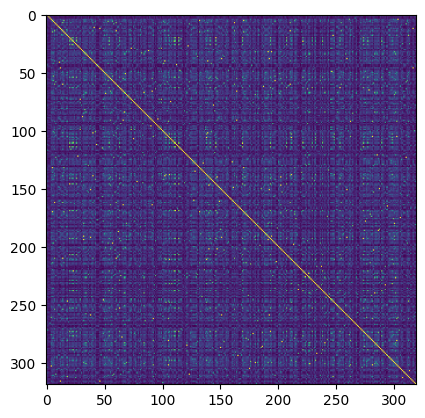

In [31]:
import seaborn as sns
fig, ax = plt.subplots()
im = ax.imshow(k)

In [32]:
mcs_features_np = mcs_features.numpy()
mcs_features_np

array([[-0.20239587,  0.12774311, -0.40260866, ..., -0.06270441,
         0.18852201, -0.1736312 ],
       [ 0.23779953, -0.37776372, -0.23917142, ..., -0.045548  ,
        -0.14361781,  0.19814676],
       [ 0.57281834, -0.47612494,  0.00808758, ..., -0.19852507,
         0.04775321, -0.12860015],
       ...,
       [-0.04887223,  0.03675393,  0.18892245, ..., -0.28594652,
         0.01306008, -0.2932509 ],
       [ 0.20113678, -0.45098415, -0.11507109, ...,  0.08041665,
        -0.164907  , -0.12179801],
       [ 0.38810164, -0.40072888, -0.2673205 , ..., -0.064068  ,
        -0.04368165,  0.12527159]], dtype=float32)

In [33]:
compound_feature_matrix = np.zeros((len(all_smarts_unique), mcs_features_np.shape[1]))

for i, smarts in enumerate(all_smarts_unique):
    if smarts in all_smarts_unique:
        idx = all_smarts_unique.index(smarts)
        compound_feature_matrix[i, :] = mcs_features_np[idx]

compound_feature_matrix = pd.DataFrame(compound_feature_matrix, index=all_smarts_unique)
compound_feature_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
[#7&R]:&@[#6]1:&@[#6]-&@[#6](-&@[#7](-&@[#6]-&@1=&!@[#8&!R])-&!@[#6&R]:&@[#6&R](-&!@[#9&!R]):&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R],-0.202396,0.127743,-0.402609,-0.470713,-0.328480,-0.211233,0.080949,-0.294398,0.341393,-0.214121,0.020062,0.222300,-0.086409,-0.085619,0.025681,-0.015439,0.125618,-0.062704,0.188522,-0.173631
"[#6]1:&@[#7]:&@[#6](:&@[#6](:&@[#7]:&@1-&!@[#6&!R]):,-;@[#6&R](:,-;@[#7&R])-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R]:&@[#6&R]):,-;@[#6&R]",0.237800,-0.377764,-0.239171,0.228954,0.116276,0.001095,-0.019189,-0.549429,-0.035577,0.218015,-0.360496,0.279598,0.129398,0.144134,-0.128101,-0.042025,-0.027839,-0.045548,-0.143618,0.198147
"[#6&R]:,-;@[#6&R](-&!@[#6&!R]-&!@[#6&!R]-&!@[#7&!R]-&!@[#6&!R]-&!@[#6&R]:,-;@[#6&R]:,-;@[#6&R]:,-;@[#6&R]:&@[#6&R]:&@[#6&R]):,-;@[#6&R]:,-;@[#6&R]:,-;@[#7&R]-&!@[#6&!R]",0.572818,-0.476125,0.008088,0.311425,0.149817,-0.365984,-0.119977,-0.188734,-0.034098,-0.069124,-0.113349,-0.141539,0.141397,0.105563,-0.007768,0.113388,0.024947,-0.198525,0.047753,-0.128600
"[#6&R](-&!@[#6&!R]-&!@[#6&!R]):&@[#6&R](:,-;@[#6&R]):&@[#6&R](:,-;@[#6&R]):&@[#7&R]",0.666982,-0.257589,0.061805,0.228822,0.229131,-0.284270,0.063351,-0.081854,-0.033939,-0.251686,-0.193893,0.212962,0.133700,0.053232,-0.177780,0.190281,0.095388,-0.013765,-0.207121,0.020639
"[#6&!R](-&!@[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R])-&@[#6&R](-&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6&!R]-&!@[#8&!R]",-0.165262,-0.054203,0.251738,0.062286,-0.239083,0.312759,-0.332883,0.186580,-0.132307,-0.450563,-0.053684,0.308653,0.408244,-0.123428,0.054737,0.188335,0.012710,0.059425,-0.227364,-0.086513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"[#6&!R]-&!@[#6&R]:,-;@[#7&R]:,-;@[#6&R](:,-;@[#6&R]:,-;@[#6&R]):,-;@[#6&R]:,-;@[#6&R]-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]",0.250933,-0.469092,-0.265433,0.313318,0.315119,-0.383010,-0.155557,0.195445,0.083681,-0.329052,0.121860,-0.255563,0.090732,0.063200,-0.049335,0.024071,-0.089627,-0.081051,0.121135,0.003734
"[#6&R](-,:;@[#7&R]-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R])-,:;@[#6&R]-&!@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]",0.510800,-0.363721,-0.082119,0.315044,0.016851,-0.163956,-0.079853,-0.313786,0.011958,-0.061416,-0.276065,0.027509,0.180497,0.064875,-0.128588,-0.098350,0.059151,-0.334544,0.174854,-0.280925
[#6&R]-&@[#7&R]-&@[#6&R](-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&@[#6&R],-0.048872,0.036754,0.188922,-0.137330,-0.179154,0.423713,-0.294350,0.119845,-0.078894,-0.312083,-0.166276,0.138778,0.020700,0.355314,0.334551,-0.260977,-0.062506,-0.285947,0.013060,-0.293251
"[#6&R]:&@[#6&R](-&!@[#6&R]:,-;@[#6&R]:,-;@[#6&R]-&@[#6&R](-&@[#7&R]-&@[#6&R]-&!@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R](-&!@[#17&!R]):&@[#6&R])=&!@[#8&!R]):&@[#6&R]",0.201137,-0.450984,-0.115071,0.325365,-0.128820,-0.431543,0.041450,0.154751,-0.038352,0.102033,0.003260,-0.254312,-0.395278,0.034564,-0.054773,0.111636,-0.332563,0.080417,-0.164907,-0.121798


In [34]:
kmeans = KMeans(n_clusters=9, random_state=0)
labels = kmeans.fit_predict(compound_feature_matrix)
labels

array([3, 2, 2, 2, 6, 8, 8, 4, 3, 4, 0, 7, 6, 4, 4, 8, 7, 4, 4, 0, 1, 3,
       1, 1, 7, 3, 1, 0, 0, 3, 2, 7, 6, 8, 8, 3, 5, 7, 7, 8, 4, 7, 8, 2,
       2, 2, 6, 0, 3, 3, 4, 8, 4, 8, 1, 6, 8, 8, 3, 5, 4, 0, 0, 1, 3, 7,
       6, 8, 8, 6, 2, 6, 4, 3, 2, 0, 3, 6, 2, 4, 5, 4, 0, 3, 8, 6, 0, 5,
       7, 0, 7, 6, 4, 5, 3, 5, 7, 3, 0, 3, 5, 8, 4, 1, 3, 4, 1, 0, 1, 2,
       1, 1, 2, 5, 1, 3, 3, 2, 5, 3, 2, 8, 0, 3, 3, 4, 7, 7, 7, 8, 5, 2,
       8, 4, 0, 7, 8, 3, 1, 4, 6, 1, 8, 6, 2, 3, 1, 6, 0, 0, 7, 7, 4, 5,
       0, 4, 8, 3, 2, 2, 7, 0, 4, 7, 6, 0, 2, 5, 0, 1, 8, 6, 8, 4, 3, 0,
       6, 2, 3, 7, 6, 2, 6, 4, 2, 7, 3, 0, 6, 4, 4, 6, 7, 1, 6, 3, 3, 8,
       2, 2, 6, 8, 6, 5, 3, 0, 5, 1, 0, 0, 4, 1, 3, 2, 8, 6, 4, 5, 2, 5,
       8, 1, 3, 8, 5, 3, 8, 8, 2, 1, 2, 6, 1, 5, 2, 5, 8, 5, 1, 2, 8, 2,
       3, 8, 2, 3, 3, 4, 1, 2, 0, 0, 6, 1, 4, 4, 4, 2, 0, 7, 5, 6, 4, 5,
       6, 0, 2, 8, 2, 2, 7, 3, 2, 1, 3, 3, 6, 1, 7, 8, 3, 4, 5, 8, 6, 8,
       3, 7, 2, 1, 8, 7, 5, 0, 0, 4, 4, 7, 1, 6, 6,

In [35]:
df_allsmilesunique_cluster = pd.DataFrame({
    "smarts": all_smarts_unique,
    "cluster": labels
})
df_allsmilesunique_cluster

,smarts,cluster
0,[#7&R]:&@[#6]1:&@[#6]-&@[#6](-&@[#7](-&@[#6]-&...,3
1,[#6]1:&@[#7]:&@[#6](:&@[#6](:&@[#7]:&@1-&!@[#6...,2
2,"[#6&R]:,-;@[#6&R](-&!@[#6&!R]-&!@[#6&!R]-&!@[#...",2
3,"[#6&R](-&!@[#6&!R]-&!@[#6&!R]):&@[#6&R](:,-;@[...",2
4,[#6&!R](-&!@[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#...,6
...,...,...
314,"[#6&!R]-&!@[#6&R]:,-;@[#7&R]:,-;@[#6&R](:,-;@[...",5
315,"[#6&R](-,:;@[#7&R]-,:;@[#6&R]-,:;@[#6&R]-,:;@[...",2
316,[#6&R]-&@[#7&R]-&@[#6&R](-&!@[#6]1:&@[#6]:&@[#...,6
317,"[#6&R]:&@[#6&R](-&!@[#6&R]:,-;@[#6&R]:,-;@[#6&...",5


In [36]:
cluster_groups = df_allsmilesunique_cluster.groupby("cluster")["smarts"].apply(list).to_dict()
cluster_groups

{0: ['[#6&R](:,-;@[#6&R]:,-;@[#6&R](:,-;@[#6&R]-,:;@[#6&R]-,:;@[#6&R])-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1):,-;@[#6&R]:,-;@[#6&R]',
  '[#6]1:&@[#6]:&@[#6](:&@[#6](:&@[#7]:&@1-&!@[#6&!R])-,:;@[#6&R])-,:;@[#6&R]',
  '[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R]-&@[#6&R](:,-;@[#6&R]-,:;@[#6&R]-&@[#7&R]):,-;@[#6&R](:,-;@[#7&R])-&!@[#6&!R]-&!@[#6&!R]',
  '[#7&R]-&@[#6&R](=&!@[#8&!R])-&@[#6&R](:,-;@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]):,-;@[#6&R]-&@[#7&R]-&@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1',
  '[#6&R](:,-;@[#6&R]:,-;@[#6&R]-,:;@[#6&R]-&@[#7&R]):,-;@[#7&R]:,-;@[#6&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1',
  '[#7&R]:,-;@[#6&R]-&@[#6&R]-&@[#7&R]-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1',
  '[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R]-&@[#6&R](:,-;@[#6&R](:,-;@[#7&R])-&@[#6&R]):,-;@[#6&R]:,-;@[#7&R]',
  '[#6&R]-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R](-&@[#6&R]-&@[#6&R])-,:;@[#6&R](-&@[#6&R]-&!@[#6]

In [37]:
compound_cluster_assignment = []

for smiles in lista:
    mol = Chem.MolFromSmiles(smiles)
    assigned_cluster = None
    for cluster_num, smarts_list in cluster_groups.items():
        for mcs_smarts in smarts_list:
            mcs_mol = Chem.MolFromSmarts(mcs_smarts)
            if mol.HasSubstructMatch(mcs_mol):
                assigned_cluster = cluster_num
                break
        if assigned_cluster is not None:
            break
    compound_cluster_assignment.append(assigned_cluster)

compound_cluster_assignment

[0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [38]:
binary_matrix = np.zeros((len(lista), len(all_smarts_unique)), dtype=int)

for i, smiles in enumerate(lista):
    mol = Chem.MolFromSmiles(smiles)
    for j, mcs_smarts in enumerate(all_smarts_unique):
        mcs_mol = Chem.MolFromSmarts(mcs_smarts)
        if mol.HasSubstructMatch(mcs_mol):
            binary_matrix[i, j] = 1

binary_df = pd.DataFrame(binary_matrix, index=lista, columns=all_smarts_unique)
binary_df

,[#7&R]:&@[#6]1:&@[#6]-&@[#6](-&@[#7](-&@[#6]-&@1=&!@[#8&!R])-&!@[#6&R]:&@[#6&R](-&!@[#9&!R]):&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R],"[#6]1:&@[#7]:&@[#6](:&@[#6](:&@[#7]:&@1-&!@[#6&!R]):,-;@[#6&R](:,-;@[#7&R])-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R]:&@[#6&R]):,-;@[#6&R]","[#6&R]:,-;@[#6&R](-&!@[#6&!R]-&!@[#6&!R]-&!@[#7&!R]-&!@[#6&!R]-&!@[#6&R]:,-;@[#6&R]:,-;@[#6&R]:,-;@[#6&R]:&@[#6&R]:&@[#6&R]):,-;@[#6&R]:,-;@[#6&R]:,-;@[#7&R]-&!@[#6&!R]","[#6&R](-&!@[#6&!R]-&!@[#6&!R]):&@[#6&R](:,-;@[#6&R]):&@[#6&R](:,-;@[#6&R]):&@[#7&R]","[#6&!R](-&!@[#7&R](-&@[#6&R](=&!@[#8&!R])-&@[#6&R]-,:;@[#6&R])-&@[#6&R](-&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6&!R]-&!@[#8&!R]",[#6&R](:&@[#6&R]:&@[#6&R]:&@[#7&R])-&@[#6&R](-&@[#7&R](-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R])=&!@[#8&!R],[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#6]:&@[#6]:&@1-&!@[#6&R]-&@[#7&R](-&@[#6&R](-&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#7&R]-&!@[#6&!R]-&!@[#6&!R])=&!@[#8&!R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R],[#7&R]:&@[#6]1:&@[#6]-&@[#6](-&@[#7](-&@[#6]-&@1=&!@[#8&!R])-&!@[#6&R](:&@[#6&R]:&@[#6&R](-&!@[#17&!R]):&@[#6&R]):&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1,[#6&!R]-&!@[#6]1-&@[#6]-&@[#6]-&@[#6](-&@[#6]-&@[#6]-&@1)-&!@[#6&!R]-&!@[#7]1:&@[#6](-&!@[#7]2-&@[#6]-&@[#6]-&@[#8]-&@[#6]-&@[#6]-&@2):&@[#7]:&@[#6]2:&@[#6]:&@1:&@[#6](:&@[#7]:&@[#6](:&@[#6]:&@2)-&!@[#6]1:&@[#7]:&@[#8]:&@[#6](:&@[#7]:&@1)=&!@[#8&!R])-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#7&R]:&@[#6&R],[#6&R]:&@[#6&R](-&!@[#6]1:&@[#6]:&@[#6]2:&@[#6](:&@[#7]:&@1-&!@[#6&!R](-&!@[#6&!R])-&!@[#6&!R])-&@[#6](-&@[#7](-&@[#6]-&@2=&!@[#8&!R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R](-&!@[#17&!R]):&@[#6&R]):&@[#6&R]-&!@[#8&!R]-&!@[#6&!R],...,[#6&R](:&@[#6&R]:&@[#6&R]):&@[#6&R](:&@[#6&R]):&@[#7&R](-&!@[#6&!R]):&@[#6&R],[#6&R]-&@[#6&R]-&@[#7&R](-&!@[#6]1:&@[#7]:&@[#6]2:&@[#6](:&@[#7]:&@1-&!@[#6&!R]-&!@[#6]1-&@[#6]-&@[#6]-&@[#6](-&@[#6]-&@[#6]-&@1)-&!@[#6&!R]):&@[#6](:&@[#7]:&@[#6](:&@[#6]:&@2)-&!@[#6]1:&@[#7]:&@[#8]:&@[#6](:&@[#7]:&@1)=&!@[#8&!R])-&!@[#6&R](:&@[#6&R]:&@[#7&R]:&@[#6&R]):&@[#6&R])-&@[#6&R]-&@[#6&R],[#6&R](:&@[#6&R]:&@[#6&R]:&@[#7&R])-&@[#6&R](-&@[#7&R](-&@[#6&R]-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&!@[#6]1:&@[#6]:&@[#6](-&!@[#17&!R]):&@[#6]:&@[#7](:&@[#6]:&@1)-&!@[#6&!R])=&!@[#8&!R],[#6&R]:&@[#6&R](-&!@[#7]1:&@[#7]:&@[#6]2:&@[#6](:&@[#6]:&@1-&!@[#6&!R](-&!@[#6&!R])-&!@[#6&!R])-&@[#6](-&@[#7](-&@[#6]-&@2=&!@[#8&!R])-&!@[#6&R](:&@[#6&R]:&@[#6&R](-&!@[#17&!R]):&@[#6&R]):&@[#6&R])-&!@[#6]1:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@[#6]:&@1):&@[#6&R]-&!@[#8&!R]-&!@[#6&!R],"[#7]1-&@[#6](=&!@[#8&!R])-&@[#6]-&@[#6]-,:;@[#6]-&@[#6]-&@1-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R]","[#6&!R]-&!@[#6&R]:,-;@[#7&R]:,-;@[#6&R](:,-;@[#6&R]:,-;@[#6&R]):,-;@[#6&R]:,-;@[#6&R]-&!@[#6&R](:&@[#6&R]):&@[#6&R]:&@[#6&R](:&@[#6&R])-&!@[#17&!R]","[#6&R](-,:;@[#7&R]-,:;@[#6&R]-,:;@[#6&R]-,:;@[#6&R])-,:;@[#6&R]-&!@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]",[#6&R]-&@[#7&R]-&@[#6&R](-&!@[#6]1:&@[#6]:&@[#6]:&@[#6](:&@[#6]:&@[#6]:&@1)-&!@[#17&!R])-&@[#6&R],"[#6&R]:&@[#6&R](-&!@[#6&R]:,-;@[#6&R]:,-;@[#6&R]-&@[#6&R](-&@[#7&R]-&@[#6&R]-&!@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R](-&!@[#17&!R]):&@[#6&R])=&!@[#8&!R]):&@[#6&R]","[#6&R]-&!@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#7&R]-&!@[#6&!R])-,:;@[#6&R](-&!@[#6&R](:&@[#6&R]:&@[#6&R]:&@[#6&R]):&@[#6&R])-,:;@[#7&R]"
O=C(O)C1CCC(NC(=O)[C@@H]2NC3(CCCCC3)[C@@]3(C(=O)Nc4cc(Cl)ccc43)[C@H]2c2cccc(Cl)c2F)CC1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Cc1cc(Cl)ccc1C1c2c(nn(CCO)c2C(C)C)C(=O)N1c1cccc(Cl)c1F,1,0,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
CCOC(=O)c1c(C(C(=O)NCc2ccccc2)N(CC(C)C)C(C)=O)c2ccc(Cl)cc2n1C(=O)OC(C)(C)C,0,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
CC1(C)CCC2(CC1)NC(C(=O)N[C@H]1CC[C@H](O)CC1)C(c1cccc(Cl)c1F)[C@]21C(=O)Nc2cc

In [56]:
def myfunc(df_binary):
    df = df_binary.copy()
    clusters = []
    
    while not df.empty:
        mcs_counts = df.sum(axis = 0)
        
        top_mcs = mcs_counts.idxmax()
        top_mcs_count = mcs_counts.max()
        
        if top_mcs_count == 0:
            break
            
        mols_with_top_mcs = df[df[top_mcs] == 1].index.tolist()
        
        clusters.append((top_mcs, mols_with_top_mcs))
        
        df = df.drop(index = mols_with_top_mcs)
    
    unassigned = df.index.tolist()
    return clusters, unassigned

clusters, unassigned = myfunc(binary_df)

In [39]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(binary_df)

In [40]:
dbsc = DBSCAN(eps=5)
labels = dbsc.fit_predict(binary_df)

In [41]:
df_molecules = pd.DataFrame({
    "smiles": lista,
    "x": [c[0] if i < len(coords) else None for i, c in enumerate(coords)],
    "y": [c[1] if i < len(coords) else None for i, c in enumerate(coords)],
    "cluster": labels
})

df_molecules

,smiles,x,y,cluster
0,O=C(O)C1CCC(NC(=O)[C@@H]2NC3(CCCCC3)[C@@]3(C(=...,1.003499,-3.632334,-1
1,Cc1cc(Cl)ccc1C1c2c(nn(CCO)c2C(C)C)C(=O)N1c1ccc...,0.992798,-3.674971,-1
2,CCOC(=O)c1c(C(C(=O)NCc2ccccc2)N(CC(C)C)C(C)=O)...,0.998881,-3.644144,-1
3,CC1(C)CCC2(CC1)NC(C(=O)N[C@H]1CC[C@H](O)CC1)C(...,0.999006,-3.623369,-1
4,COc1nc(N(C)C)ncc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc...,0.999917,-3.687066,-1
5,CCOCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)...,0.998006,-3.683639,0
6,CC(C)S(=O)(=O)C[C@@H](N1C(=O)[C@@](C)(CC(=O)O)...,0.963317,-3.638372,1
7,C[C@H]1CC[C@H](Cn2c(N3CCOC[C@H]3c3ccccc3)nc3cc...,0.993688,-3.749722,-1
8,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2...,0.995043,-3.631943,-1
9,CC[C@@H](C)Oc1cc2c(cc1OC)CC(=O)N(c1ccc(C(C)N3C...,0.989523,-3.623276,-1


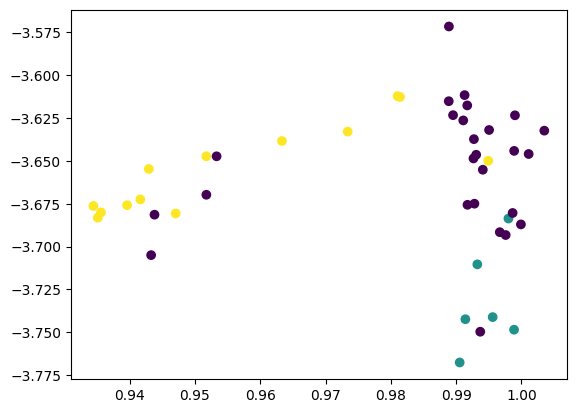

In [42]:
x = df_molecules["x"]
y = df_molecules["y"]
plt.scatter(x, y, c=df_molecules["cluster"])
plt.show()

In [43]:
rdkitGen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
fingerprints = []
for mol in lista:
    moll = Chem.MolFromSmiles(mol)
    Chem.SanitizeMol(moll)
    fp = rdkitGen.GetFingerprint(moll)
    fingerprints.append(fp)

In [ ]:
# fp to numpy array
def fingerprints_to_numpy(fingerprints):
    fp_arrays = []
    for fp in fingerprints:
        arr = np.zeros((fp.GetNumBits(),), dtype=np.int32)
        DataStructs.ConvertToNumpyArray(fp, arr)
        fp_arrays.append(arr)
    
    return np.array(fp_arrays)

mcs_fp_array = fingerprints_to_numpy(fingerprints)
mcs_fp_array

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int32)

In [45]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(mcs_fp_array)

In [46]:
dbsc = DBSCAN(eps=5)
labels = dbsc.fit_predict(binary_df)

In [47]:
df_molecules = pd.DataFrame({
    "smiles": lista,
    "x": [c[0] if i < len(coords) else None for i, c in enumerate(coords)],
    "y": [c[1] if i < len(coords) else None for i, c in enumerate(coords)],
    "cluster": labels
})

df_molecules

,smiles,x,y,cluster
0,O=C(O)C1CCC(NC(=O)[C@@H]2NC3(CCCCC3)[C@@]3(C(=...,1.003499,-3.632334,-1
1,Cc1cc(Cl)ccc1C1c2c(nn(CCO)c2C(C)C)C(=O)N1c1ccc...,0.992798,-3.674971,-1
2,CCOC(=O)c1c(C(C(=O)NCc2ccccc2)N(CC(C)C)C(C)=O)...,0.998881,-3.644144,-1
3,CC1(C)CCC2(CC1)NC(C(=O)N[C@H]1CC[C@H](O)CC1)C(...,0.999006,-3.623369,-1
4,COc1nc(N(C)C)ncc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc...,0.999917,-3.687066,-1
5,CCOCC(C)c1nc2cc(-c3noc(=O)[nH]3)nc(-c3cncc(Cl)...,0.998006,-3.683639,0
6,CC(C)S(=O)(=O)C[C@@H](N1C(=O)[C@@](C)(CC(=O)O)...,0.963317,-3.638372,1
7,C[C@H]1CC[C@H](Cn2c(N3CCOC[C@H]3c3ccccc3)nc3cc...,0.993688,-3.749722,-1
8,CCOc1cc(C(C)(C)C)ccc1C1=N[C@@](C)(c2ccc(Cl)cc2...,0.995043,-3.631943,-1
9,CC[C@@H](C)Oc1cc2c(cc1OC)CC(=O)N(c1ccc(C(C)N3C...,0.989523,-3.623276,-1


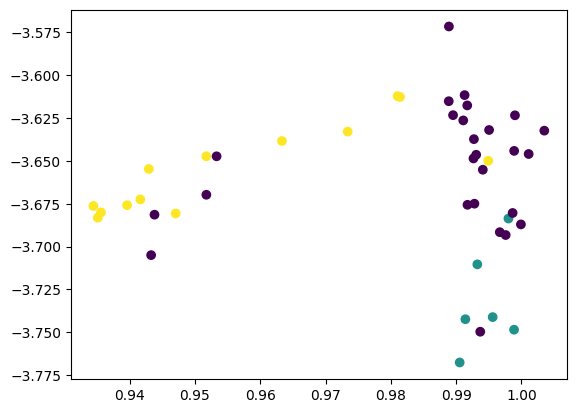

In [48]:
x = df_molecules["x"]
y = df_molecules["y"]
plt.scatter(x, y, c=df_molecules["cluster"])
plt.show()